- https://perso.telecom-paristech.fr/sabourin/mdi720/mdi720.html
- https://sitepedago.telecom-paristech.fr/front/site_MDI720.html 
- https://sitepedago.telecom-paristech.fr/front/frontoffice.php?SP_ID=3220&#R3184
- Avant : http://josephsalmon.eu/MDI720.html

Références conseillées :
- Delyon 2013 (https://perso.univ-rennes1.fr/bernard.delyon/prbase.pdf)
- Saporta : proba, stat, machine learning, 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Modèle statistique

Le modèle statistique est une famille de lois: 

$\mathcal{M}=\{P_\theta: \theta \subset \Theta\}$ 

Le modèle est paramétrique si $\Theta \subset \mathbb{R}^p$

### Exo : 

Proposer un modèle $\mathcal{M}$ pour le “lancer de dé”.

#### Solution

$\mathcal{M} = \{p_i, i \in \{1, 6\}, p_i \in [0, 1] | \sum_{i=0}^n = 1 \}$

### Estimateur
La fonction $g$ est estimée par $\hat{g}$

Exemple: $Y \sim \mathcal{N}(μ, \sigma^2), \theta = (μ, \sigma^2), Θ=\mathbb{R}  x \mathbb{R}_∗^+$

$g(θ)=θ_1=μ$

Exemples d'estimateurs:

$\hat{g_1}(y_1, …, y_n)= \frac{1}{n} \sum{y_i}$  (BON)

$\hat{g_2}(y_1, …, y_n)= y_1$  (MEDIOCRE)

$\hat{g_3}(y_1, …, y_n)= \sum \frac{(y_i - \mu)^2}{\sigma^2}$ (PAS BON car utilise $\theta$)

### Densité

$X \sim P$, de densité p par rapport à dx (au sens de Lesbegue)

### Biais

$Biais(\hat{g},g) = E_\theta(\hat{g}(y_1, …,y_n) - g(\theta)$

#### Exo 

Biais de l'estimateur de la variance 
$$\hat{g_5}(y_1, …, y_n) = \frac 1n \sum_{i=0}^{n}(y_i - \bar{y})^2$$

##### Solution

\begin{align}
E\left(\hat{g_5}(y_1, …, y_n)\right) &= E\left( \frac 1n \sum_{i=0}^{n}(y_i - y)^2 \right) \\
&= E\left( \frac 1n \sum_{i=0}^{n}(y_i^2 + \bar{y}^2 - 2 y_i \bar{y}) \right) \\
&= E\left( Y^2 + \left( \frac 1n \sum_{i=0}^{n} y_i \right)^2 - \frac{2}{n^2} \sum_{i=0}^{n}\sum_{j=0}^{n}( y_i y_j ) \right) \\
&= E\left( Y^2 - \frac{1}{n^2} \left( \sum_{i=0}^{n} y_i \right)^2 \right)\\
\end{align}


\begin{align}
\frac{1}{n^2} E\left( \left( \frac 1n \sum_{i=0}^{n} y_i \right)^2 \right) &= \frac{1}{n^2} E\left(  \sum_{i=0}^{n}\sum_{j=0}^{n}( y_i y_j ) \right) \\
&= \frac{1}{n^2} E \left( \sum_{i=0}^{n}\left( y_i^2 + \sum_{j \ne i} y_i y_j \right) \right)\\
&= \frac{1}{n^2} E \left( \sum_{i=0}^{n}\left( y_i^2 + \sum_{j \ne i} y_i y_j \right) \right)\\
&= \frac 1n E \left( Y^2 \right) + \frac{n(n-1)}{n^2}E(Y)^2 \\
&= \frac 1n E \left( Y^2 \right) + \frac{n-1}{n}E(Y)^2 \\
\end{align}

Avec l'hypothèse que les $y_i$ sont indépendants

Finalement : 
\begin{align}
E\left(\hat{g_5}(y_1, …, y_n)\right) &= E\left( Y^2 \right) 
    - \frac 1n E \left( Y^2 \right) - \frac{n-1}{n}E(Y)^2 \\
&= \frac{n-1}{n} \left( E( Y^2 ) - E(Y)^2 \right)\\
\end{align}

D'où le biais:
\begin{align}
E\left(\hat{g_5}(y_1, …, y_n)\right) - Var(Y) 
    &= \frac{n-1}{n} \left( E( Y^2 ) - E(Y)^2 \right) - E( Y^2 ) - E(Y)^2 \\
    &= \frac{-1}{n} \left( E( Y^2 ) - E(Y)^2 \right) \\
    &= \frac{-1}{n} Var(Y)
\end{align}

## Variance (de la loi)

### Variance estimée

Pour retirer le biais (perte d'1 degré de liberté)
$\hat{g} = \frac{1}{n-1} \sum{(y_i - \bar{y})^2}$


## Variance de l'estimateur

### Variance de l'estimateur de la moyenne

\begin{align}
Var(\hat{g_1}) &= Var(\frac{1}{n} \sum{Y_i}) \\
&= \frac{1}{n^2} Var(\sum{Y_i}) \\
&= \frac{n}{n^2} Var(Y_i) \\
&= \frac{1}{n} Var(Y) 
\end{align}

Hypothèse ci-dessus : $Y_i$ indépendants

\begin{align}
Var(\hat{g_2}) &= Var(Y_1) \\
&= Var(Y)
\end{align}

Médiocre car ne diminue pas avec n

## Risque quadratic

$R(\hat{g}) = E\bigl((\hat{g} - g)^2\bigr) = Var(\hat{g}) + Biais(\hat{g})^2$

Preuve:

$R(\hat{g}) = E\bigl((\hat{g} - g)^2\bigr) = E\bigl((\hat{g} - E(\hat{g}) + E(\hat{g}) - g)^2\bigr)$

Puis développer et extraire les constantes

# Estimateurs empiriques

## Moyenne empirique


$\bar{y_n} = \langle y_i, \frac{\mathbb{1_n}}{n} \rangle$

#### Exo

Correspond à une projection de $y_i$ sur le vecteur normalisé des constantes

##### Solution

$v = (1,...,1), u = \frac{1}{\Vert v \Vert} v = \frac{1}{\sqrt{n}} v$

$\langle u, y \rangle u = \langle \frac{1}{\sqrt{n}} \mathbb{1_n}, y \rangle \frac{1}{\sqrt{n}} \mathbb{1_n}$

### Exo

Montrer que : 
$ \bar{y_n} = argmin_{a \in R} \left[ E_n \left((Y - a)^2\right) \right] = argmin_{a \in R} \frac 1n \sum(y_i - a)^2$ 

#### Solution (MSE = Mean Square Error) :

\begin{align}
f(a) & = \frac 1n \sum(y_i - a)^2 \\
& = \frac 1n \sum(y_i^2 + a^2 - 2y_i a) \\
& = \frac 1n \sum(y_i^2) + a^2 - 2a \bar{y_n} \\
\frac{\partial f(a)}{\partial a} & =  2a - 2 \bar{y_n} \\
\frac{\partial f(a)}{\partial a} & = 0 \iff a =\bar{y_n}
\end{align}

### _Exo_

Moyenne, Mediane, Moyenne tronquée (15%) sur une distribution exponentielle

In [2]:
n = 1000
lam = 2
x = np.random.exponential(lam, n)
mean = 1/n * np.sum(x)
x_sorted = np.sort(x)
median = 1/2 * (x_sorted[math.floor(n/2)-1] + x_sorted[math.ceil(n/2)-1])
x_truncated = x_sorted[math.floor(n*0.15)-1:math.ceil(n*0.85)-1]
meanTruncated = 1/x_truncated.shape[0] * np.sum(x_truncated)
(mean, median, meanTruncated)

(1.9381005076447013, 1.3278129712357238, 1.5020151902024619)

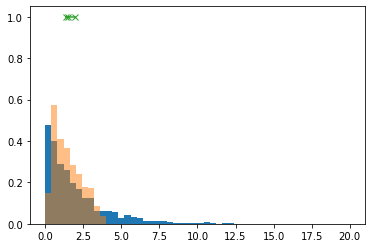

In [3]:
plt.hist(x, 50, density=True, range=(0, 20));
plt.hist(x_truncated, 50, alpha=0.5, density=True, range=(0, 20))
plt.plot(np.array((mean, median, meanTruncated)), np.ones(3), marker='x');

## Variance empirique

$Var_n(y) = \frac 1n \sum_{i=0}^n(y_i - \bar{y_n})^2 = \frac 1n \Vert y - \bar{y_n} \mathbb{1_n} \Vert^2$

### Exo

Quels sont les vecteurs $y \in \mathbb{R}^n$ tels que $Var_n(y) = 0$

#### Solution

Les vecteurs où les $y_i$ sont constants

## Histogramme

### Méthode à noyaux (KDE = Kernel Density Estim)

Une gaussienne est appliquée sur chaque point, puis la somme est réalisée

## Quantile

Fonction inverse généralisée de la CDF (qui peut être ni continue, ni strictement croissante)

$p \in ]0, 1] F^\leftarrow(p) = min\{y: F(y) \ge p\}$

$F^\leftarrow(0) = -\infty$

$F^\leftarrow(1) = ?$

- Si CDF à support comptact (= densité sur interval borné)

Exemple : $Y \sim U_{[a, b]}$

$F^\leftarrow(1) = b$

- Si CDF sur support non borné

Exemple : $Y \sim \mathcal{E}(1)$

PDF : $f(y) = \mathbb{1}_{\{y \ge 0\}} e^{-\lambda y}$ 

$\{u: F(u) \ge 1 \} = \emptyset$

$F^\leftarrow(1) = +\infty$



## Covariance

C'est le produit scalaire des résidus (écarts à la moyenne)

Corrélation : covariance standardisée (sans échelle)

### Exo

Montrer que $Cov(X + \mu) = Cov(X)$

#### Solution

\begin{align}
Z &= X + \mu \\
E(Z) &= E(X) + \mu \\
\\
Cov(Z) &= E \left[ (Z - E(Z)) (Z - E(Z))^T \right] \\
  &= E \left[ X X^T \right] \\
  &= Cov(X) 
\end{align}

### Démonstration alternative pour $u^T Cov(X) u \ge o$

Def : $\tilde{X} = X - E(X)$

\begin{align}
u^T Cov(X) u &= u^T E(\tilde{X} \tilde{X}^T) u \\
&= E((u^T \tilde{X}) (\tilde{X}^T u))
\end{align}

Les 2 termes sont dans $\mathbb{R}$ et égaux donc c'est l'espérance du carré de la variable aléatoire réelle $u^T \tilde{X}$ qui est donc positive.

### Exo

$Cov(AX) = A Cov(X) A^⊤$, pour toute matrice $A ∈ R^{m×p}$

##### Solution

\begin{align}
Cov(AX) &= E((AX)(AX)^T) \\
&= E((AX)(X^T A^T)) \\
&= A E(XX^T) A^T \\
&= A Cov(X) A^T \\
\end{align}

### Décomposition de la covariance

$S = Cov(X)$ est positive et semi définie, donc diagonalisable

$S = U D U^T$, $U$ est une base orthornmée, $D$ est diagonale (positive).

Alors: $S U = U D$

In [10]:
from scipy.linalg import toeplitz
from numpy.linalg import eigh
A = toeplitz([1, 2, 0, 2])
[Dint, Uint] = eigh(A)
# use eigh not eig for symmetric matrices
idx = Dint.argsort()[::-1]
D = Dint[idx]
U = Uint[:, idx]
print(np.allclose(U.dot(np.diag(D)).dot(U.T), A))

True


In [11]:
A

array([[1, 2, 0, 2],
       [2, 1, 2, 0],
       [0, 2, 1, 2],
       [2, 0, 2, 1]])

In [13]:
D

array([ 5.,  1.,  1., -3.])

In [14]:
U

array([[ 5.00000000e-01,  0.00000000e+00, -7.07106781e-01,
        -5.00000000e-01],
       [ 5.00000000e-01, -7.07106781e-01, -7.78391275e-17,
         5.00000000e-01],
       [ 5.00000000e-01, -5.97270439e-17,  7.07106781e-01,
        -5.00000000e-01],
       [ 5.00000000e-01,  7.07106781e-01, -1.81120836e-17,
         5.00000000e-01]])

## Loi Gaussienne

### Multivariée

$\vert \Sigma \vert$ est le déterminant de la matrice $\Sigma$ de covariance.

$\Sigma = U D U^T$

Comme : $\vert A B \vert = \vert B A \vert$

$\vert \Sigma \vert = \vert U (D U^T) \vert = \vert (D U^T) U \vert = \prod_i \lambda_i $

### Construction de Gaussienne multivariée à partir d'une loi $X = \mathcal{N}(0, 1)$

Soit : $Y = A X + b$

On a $Y \sim \mathcal{N}(m, S)$

Avec:

$m = E(Y) = E(A X + b) = A E(X) + b = A \mu + b$ 

Si $\mu = 0$ alors $m = b$

\begin{align}
S & = Cov(Y) = Cov(A X + b) = Cov(AX) \\
  & = E\left[ A \tilde{X} \left(A \tilde{X}\right)^T \right] \\
  & = A E\left[ \tilde{X} \tilde{X}^T \right] A^T \\
  & = A Cov(X) A^T = A \Sigma A^T
\end{align}

Si $\sigma = Id_p$, alors $S = A A^T$

La première étape de la génération est donc de décomposer $S$ en $A A^T$, en utilisant la décomposition de Cholesky

Example:

In [4]:
N, M = 10000, 5 # 10000 points, 5 features
X = np.random.normal(0, 1, (N, M))
S = np.array([[ 10, 0.5, 0.2, 0.3, 0.4],
              [0.5,   5, 0.3, 0.1, 0.2],
              [0.2, 0.3,   4, 0.3, 0.7],
              [0.3, 0.1, 0.3,   3, 0.4],
              [0.4, 0.2, 0.7, 0.4,   4]])

b = np.array([1, 2, 3, 4, 5])

In [5]:
A = np.linalg.cholesky(S)
A

array([[3.16227766, 0.        , 0.        , 0.        , 0.        ],
       [0.15811388, 2.2304708 , 0.        , 0.        , 0.        ],
       [0.06324555, 0.13001739, 1.99476702, 0.        , 0.        ],
       [0.09486833, 0.03810855, 0.14490175, 1.72294841, 0.        ],
       [0.12649111, 0.08070045, 0.34164769, 0.19467749, 1.95521481]])

In [6]:
Y = np.matmul(X, A) + b

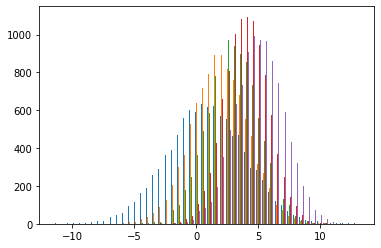

In [7]:
plt.hist(Y, 50);

In [8]:
np.mean(Y, axis=0)

array([0.94591289, 1.96618979, 2.97139344, 3.98933607, 5.0043047 ])

In [9]:
np.cov(Y.T)

array([[9.9282704 , 0.35987397, 0.16139896, 0.27110076, 0.17344079],
       [0.35987397, 5.11878749, 0.37414925, 0.09716911, 0.22906742],
       [0.16139896, 0.37414925, 4.15625123, 0.35195039, 0.63379012],
       [0.27110076, 0.09716911, 0.35195039, 3.03196001, 0.37906271],
       [0.17344079, 0.22906742, 0.63379012, 0.37906271, 3.86069139]])

## Mes questions

- Relation entre dimension d'un modèle stat et degrés de liberté ?